In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train ,test]

In [3]:
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()
print('_'*40)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Widener, Mr. Harry Elkins",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train[['Pclass' , 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train[['Sex','Survived']].groupby(['Sex'] ,as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
import seaborn as sns

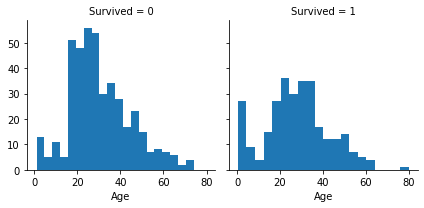

In [11]:
g = sns.FacetGrid(train , col = 'Survived')
g.map(plt.hist , 'Age' ,bins=20)

C:\Users\Rockstar\Miniconda3\envs\pawan\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


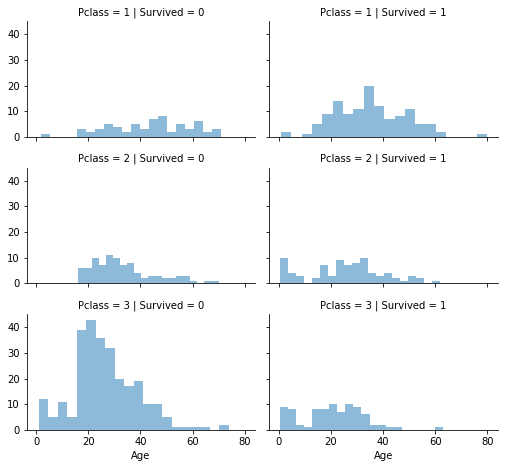

In [12]:
grid = sns.FacetGrid(train , col='Survived' , row = 'Pclass' , size =2.2 , aspect =1.6)
grid.map(plt.hist , 'Age' , alpha =0.5 , bins =20)
grid.add_legend()

C:\Users\Rockstar\Miniconda3\envs\pawan\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Rockstar\Miniconda3\envs\pawan\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


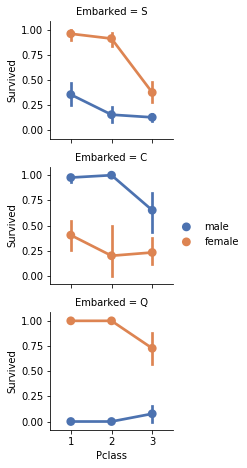

In [13]:
grid = sns.FacetGrid(train , row = 'Embarked' , height =2.2 , aspect =1.2)
grid.map(sns.pointplot , 'Pclass' , 'Survived' , 'Sex',palette = 'deep')
grid.add_legend()

C:\Users\Rockstar\Miniconda3\envs\pawan\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


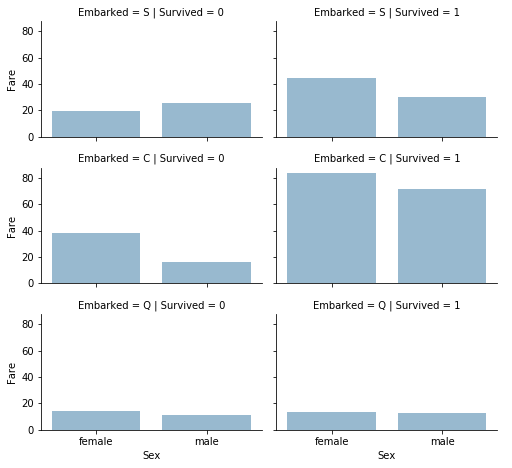

In [14]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [15]:
train  = train.drop(['Ticket','Cabin'], axis =1)
test =test.drop(['Ticket','Cabin'], axis =1)

In [16]:
combine = [train ,test]


In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand =False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                            'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title','Survived']].groupby(['Title'],as_index=False).mean()
    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [20]:
train = train.drop(['Name', 'PassengerId'],axis =1)
test = test.drop('Name',axis =1)

In [21]:
combine = [train, test]
combine[0].shape

(891, 9)

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1 , 'male':0}).astype(int)

In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


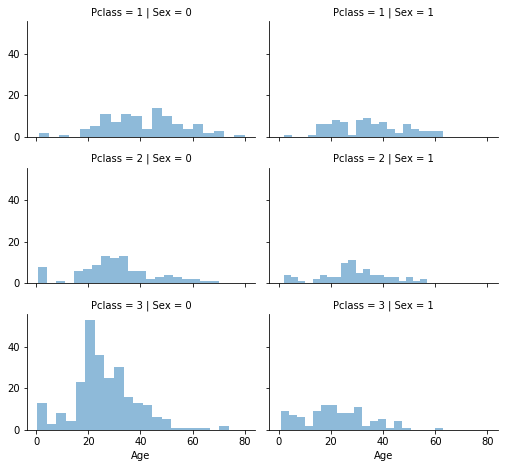

In [24]:
grid = sns.FacetGrid(train , row='Pclass' , col='Sex' , size=2.2 , aspect=1.6)
grid.map(plt.hist, 'Age' ,alpha=.5 , bins=20)
grid.add_legend()

In [25]:
guess_ages =np.zeros((2,3))

In [26]:
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [27]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            gues_df = dataset[ (dataset['Sex']==i) & (dataset['Pclass'] ==j+1)]['Age'].dropna()
            
            age_guess = gues_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
            
    
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex ==i) & (dataset.Pclass ==j+1) ,'Age'] = guess_ages[i,j]
    
    dataset['Age'] = dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


In [29]:
train['Ageband'] = pd.cut(train['Age'],5) 
train[['Ageband', 'Survived']].groupby(['Ageband'], as_index=False).mean().sort_values(by='Ageband' ,ascending=True)


,Ageband,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [30]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()
    
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ageband
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [31]:
train = train.drop(['Ageband'],axis=1)



In [32]:
combine = [train,test]


In [33]:
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1
train[['FamilySize' , 'Survived']].groupby('FamilySize' ,as_index=False).mean().sort_values(by = 'FamilySize' ,ascending =False)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1


In [34]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1


In [35]:
combine = [train,test]


In [36]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train.loc[:, ['Age*Class' , 'Age' ,'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [37]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,1,0,7.2500,S,1,2,3
1,1,1,1,2,1,0,71.2833,C,3,2,2
2,1,3,1,1,0,0,7.9250,S,2,1,3
3,1,1,1,2,1,0,53.1000,S,3,2,2
4,0,3,0,2,0,0,8.0500,S,1,1,6


In [38]:
freq_port = train['Embarked'].dropna().mode()[0]
freq_port

'S'

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by = 'Embarked' , ascending ='True')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0 ,'C':1 , 'Q':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,1,0,7.2500,0,1,2,3
1,1,1,1,2,1,0,71.2833,1,3,2,2
2,1,3,1,1,0,0,7.9250,0,2,1,3
3,1,1,1,2,1,0,53.1000,0,3,2,2
4,0,3,0,2,0,0,8.0500,0,1,1,6


In [41]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace =True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,892,3,0,2,0,0,7.8292,2,1,6
1,893,3,1,2,1,0,7.0000,0,3,6
2,894,2,0,3,0,0,9.6875,2,1,6
3,895,3,0,1,0,0,8.6625,0,1,3
4,896,3,1,1,1,1,12.2875,0,3,3


In [42]:
combine = [train,test]

In [43]:
train['FareClass'] = pd.cut(train['Fare'],4) 
train[['FareClass', 'Survived']].groupby(['FareClass'], as_index=False).mean().sort_values(by='FareClass' ,ascending=True)

,FareClass,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [44]:
for dataset in combine:    
    dataset.loc[ dataset['Fare'] <= 128.082, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] >128.082 ) & (dataset['Fare'] <= 256.165), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] >256.165 ) & (dataset['Fare'] <= 384.247), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] >384.247 ) & (dataset['Fare'] <= 512.329), 'Fare'] = 3
    dataset.loc[ dataset['Fare'] > 512.329, 'Fare']
    

In [45]:
combine = [train,test]

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int32
Title          418 non-null int64
Age*Class      418 non-null int64
dtypes: float64(1), int32(3), int64(6)
memory usage: 27.9 KB


In [47]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,892,3,0,2,0,0,0.0,2,1,6
1,893,3,1,2,1,0,0.0,0,3,6
2,894,2,0,3,0,0,0.0,2,1,6
3,895,3,0,1,0,0,0.0,0,1,3
4,896,3,1,1,1,1,0.0,0,3,3


In [48]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age*Class,FareClass
0,0,3,0,1,1,0,0.0,0,1,2,3,"(-0.512, 128.082]"
1,1,1,1,2,1,0,0.0,1,3,2,2,"(-0.512, 128.082]"
2,1,3,1,1,0,0,0.0,0,2,1,3,"(-0.512, 128.082]"
3,1,1,1,2,1,0,0.0,0,3,2,2,"(-0.512, 128.082]"
4,0,3,0,2,0,0,0.0,0,1,1,6,"(-0.512, 128.082]"


In [49]:
train = train.drop(['SibSp','Parch','FareClass'], axis =1)

In [50]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,FamilySize
0,892,3,0,2,0,0,0.0,2,1,6,1
1,893,3,1,2,1,0,0.0,0,3,6,2
2,894,2,0,3,0,0,0.0,2,1,6,1
3,895,3,0,1,0,0,0.0,0,1,3,1
4,896,3,1,1,1,1,0.0,0,3,3,3


In [51]:
test = test.drop(['SibSp','Parch'],axis=1)

In [52]:
combine = [train,test]

In [53]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,0.0,0,1,2,3
1,1,1,1,2,0.0,1,3,2,2
2,1,3,1,1,0.0,0,2,1,3
3,1,1,1,2,0.0,0,3,2,2
4,0,3,0,2,0.0,0,1,1,6


In [54]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,FamilySize
0,892,3,0,2,0.0,2,1,6,1
1,893,3,1,2,0.0,0,3,6,2
2,894,2,0,3,0.0,2,1,6,1
3,895,3,0,1,0.0,0,1,3,1
4,896,3,1,1,0.0,0,3,3,3


# Building Model

In [55]:
y_train = train['Survived']
X_train = train.drop('Survived' , axis =1)
X_test = test.drop('PassengerId',axis =1).copy()

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [57]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train,y_train)
yDT_predict = DT_clf.predict(X_test)
DT_acc = round(DT_clf.score(X_train, y_train) * 100, 2)
print(DT_acc)

86.87


# RandomForest

In [58]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train , y_train)
yRF_predict = RF_clf.predict(X_test)
RF_acc = round(RF_clf.score(X_train, y_train) * 100, 2)
print(RF_acc)

86.64


C:\Users\Rockstar\Miniconda3\envs\pawan\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# AdaBoost Classifier

In [59]:
AB_clf = AdaBoostClassifier(random_state=1)
AB_clf.fit(X_train , y_train)
yA_predict = AB_clf.predict(X_test)
AB_acc =round(AB_clf.score(X_train, y_train) * 100, 2)
print(AB_acc)

83.28


#  Support Vector Machine

In [60]:
SVM_clf = SVC(gamma='auto')
SVM_clf.fit(X_train , y_train)
ySVM_predict = SVM_clf.predict(X_test)
SVM_acc = round(SVM_clf.score(X_train, y_train) * 100, 2)
print(SVM_acc)

84.18


#  Linear Regresssion

In [61]:
LR_clf = LinearRegression()
LR_clf.fit(X_train,y_train)
yLR_predict = LR_clf.predict(X_test)
LR_acc = round(LR_clf.score(X_train, y_train)*100, 2)
print(LR_acc)


40.36


In [62]:
models =pd.DataFrame({
    'Model':['DecisionTree','RandomForest', 'SupportVectorMachine','LinearRegression'],
    'Score':[DT_acc,RF_acc,SVM_acc,LR_acc]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,DecisionTree,86.87
1,RandomForest,86.64
2,SupportVectorMachine,84.18
3,LinearRegression,40.36


In [63]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],"Survived":yDT_predict})
submission.to_csv('GenderMy.csv')